In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-06-12 20:45:53.911648: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 20:45:55.406463: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 20:45:55.408430: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 20:46:00.493749: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ИЗУЧЕНИЕ ДАННЫХ

train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

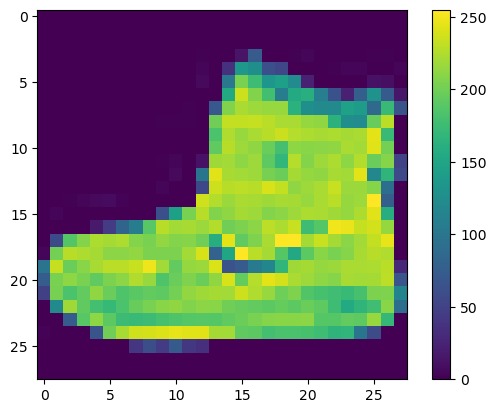

In [8]:
# ПОДГОТОВКА ДАННЫХ

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

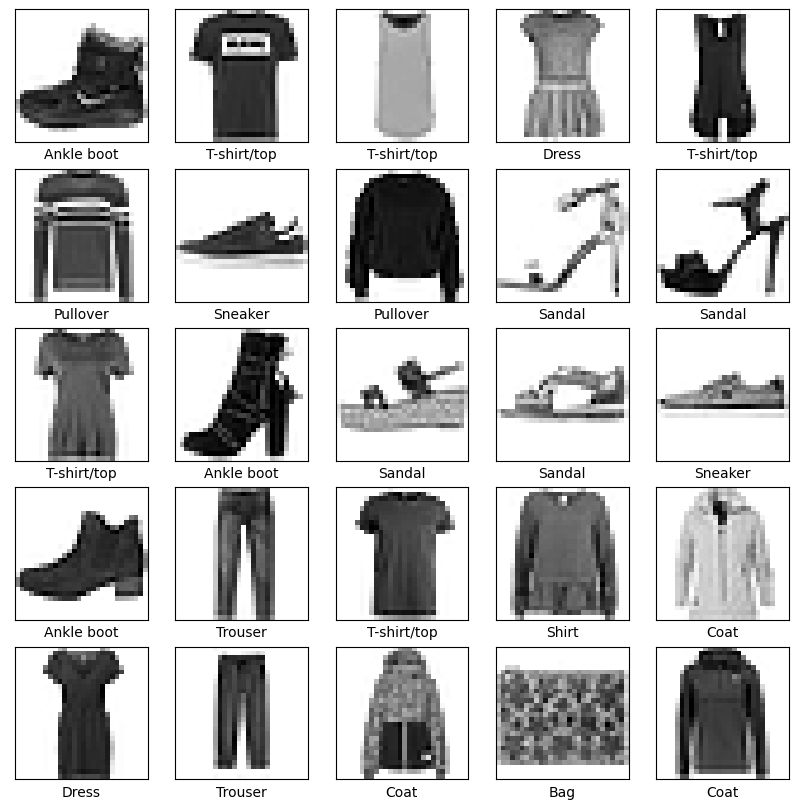

In [9]:
train_images = train_images/255.0
test_images = test_images/255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [10]:
# ПОСТРОЕНИЕ МОДЕЛИ

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
    ])


# КОМПИЛЯЦИЯ МОДЕЛИ
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
# ВЫДЕЛЕНИЕ ПРОВЕРОЧНОГО НАБОРА
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# ОБУЧЕНИЕ МОДЕЛИ
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


2023-06-12 20:46:14.998226: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.


Epoch 1/20
97/98 [============================>.] - ETA: 0s - loss: 0.7322 - accuracy: 0.7524

2023-06-12 20:46:19.211253: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


98/98 [==============================] - 4s 17ms/step - loss: 0.7307 - accuracy: 0.7530 - val_loss: 0.5104 - val_accuracy: 0.8267
Epoch 2/20
98/98 [==============================] - 1s 12ms/step - loss: 0.4660 - accuracy: 0.8377 - val_loss: 0.4438 - val_accuracy: 0.8456
Epoch 3/20
98/98 [==============================] - 1s 12ms/step - loss: 0.4194 - accuracy: 0.8517 - val_loss: 0.4110 - val_accuracy: 0.8554
Epoch 4/20
98/98 [==============================] - 1s 12ms/step - loss: 0.3935 - accuracy: 0.8615 - val_loss: 0.3900 - val_accuracy: 0.8615
Epoch 5/20
98/98 [==============================] - 2s 16ms/step - loss: 0.3742 - accuracy: 0.8673 - val_loss: 0.3847 - val_accuracy: 0.8634
Epoch 6/20
98/98 [==============================] - 1s 14ms/step - loss: 0.3597 - accuracy: 0.8716 - val_loss: 0.3696 - val_accuracy: 0.8685
Epoch 7/20
98/98 [==============================] - 1s 13ms/step - loss: 0.3459 - accuracy: 0.8770 - val_loss: 0.3618 - val_accuracy: 0.8720
Epoch 8/20
98/98 [======

In [11]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

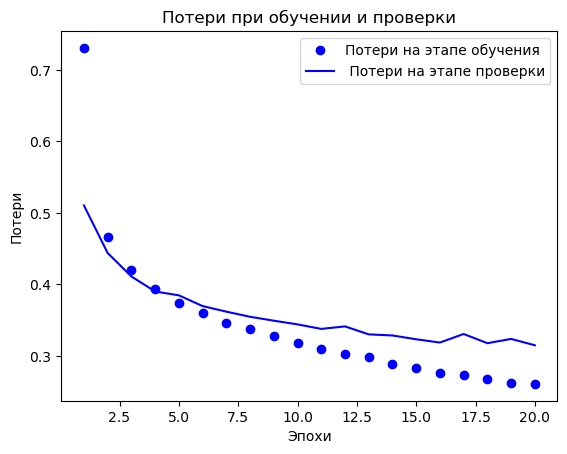

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Потери на этапе обучения')
plt.plot(epochs, val_loss, 'b', label=' Потери на этапе проверки')
plt.title('Потери при обучении и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()


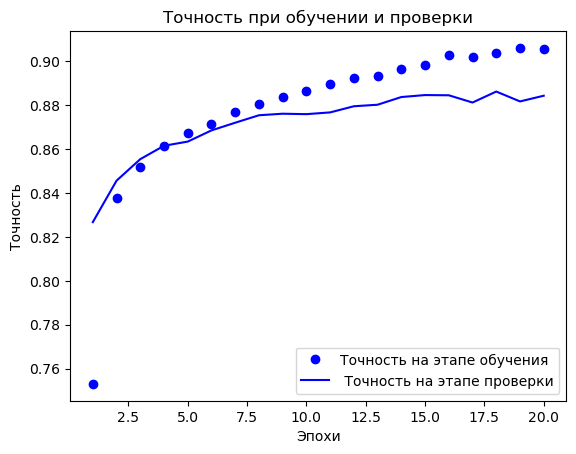

In [13]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Точность на этапе обучения')
plt.plot(epochs, val_acc, 'b', label=' Точность на этапе проверки')
plt.title('Точность при обучении и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()


In [14]:
#  ОЦЕНКА ТОЧНОСТИ МОДЕЛИ 
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nТочность на проверочных данных:', test_acc)

 19/313 [>.............................] - ETA: 0s - loss: 0.3039 - accuracy: 0.8865

2023-06-12 20:46:59.410176: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 4ms/step - loss: 0.3431 - accuracy: 0.8757

Точность на проверочных данных: 0.8756999969482422


In [15]:
# ИСПОЛЬЗОВАНИЕ МОДЕЛИ ДЛЯ ПРЕДСКАЗАНИЙ

predictions = model.predict(test_images)
predictions[0]

2023-06-12 20:47:02.149604: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 4ms/step


array([3.3936074e-06, 6.2162462e-07, 7.0259193e-06, 1.4505008e-05,
       6.0922823e-05, 3.7786219e-02, 3.5414785e-05, 1.7522380e-02,
       2.0676467e-04, 9.4436276e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])


9

In [17]:
test_labels[0]

9

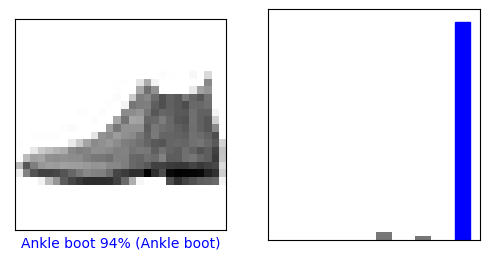

In [18]:
# График изображений 
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

# Диаграмма вероятностей классов
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()



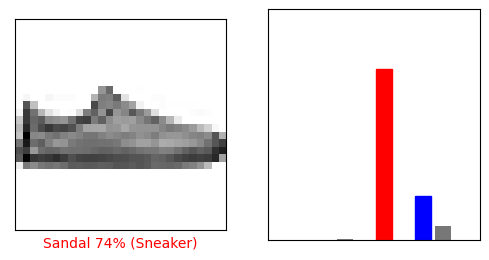

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,test_labels)
plt.show()


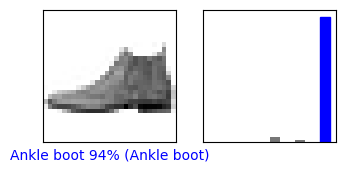

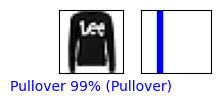

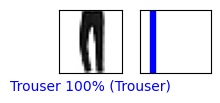

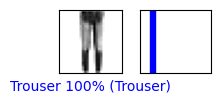

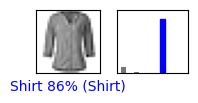

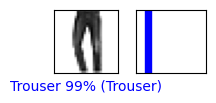

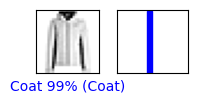

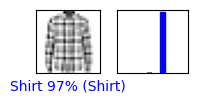

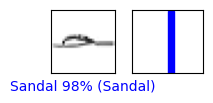

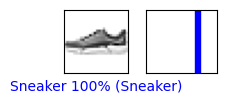

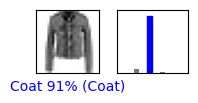

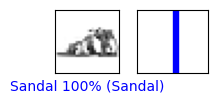

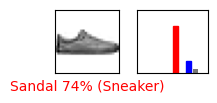

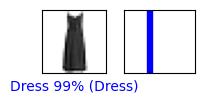

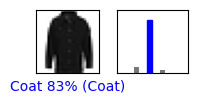

In [20]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    plt.show()


In [21]:
# Берем одну картинку из проверочного сета.
img = test_images[0]
print(img.shape)


(28, 28)


In [22]:
# Добавляем изображение в пакет данных, состоящий только из одного элемента.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [23]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 57ms/step
[[3.3936039e-06 6.2162400e-07 7.0259125e-06 1.4504994e-05 6.0922765e-05
  3.7786182e-02 3.5414716e-05 1.7522363e-02 2.0676466e-04 9.4436276e-01]]


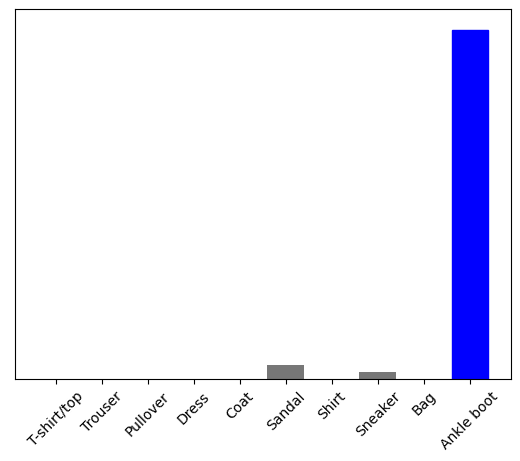

In [24]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [25]:
np.argmax(predictions_single[0])


9

In [44]:
model.save('model_tanh_class.h5')

baza_model = keras.models.load_model('model_baza_class.h5')
loss, acc = baza_model.evaluate(test_images, test_labels)
print("Базовая модель, точность: {:5.2f}%".format(100*acc))
print("Базовая модель, потери: {:5.2f}%".format(100*loss))

Dense3_model =  keras.models.load_model('model_Dop1_3dense_class.h5')
test_loss1, test_acc1 = Dense3_model.evaluate(test_images, test_labels)
print("Модель с 3 скрытыми слоями, точность: {:5.2f}%".format(100*test_acc1))
print("Модель с 3 скрытыми слоями, потери: {:5.2f}%".format(100*test_loss1))

LessNeyron64_model =  keras.models.load_model('model_Dop2_64neyrona_class.h5')
test_loss2, test_acc2 = LessNeyron64_model.evaluate(test_images, test_labels)
print("Модель с 64 нейронами, точность: {:5.2f}%".format(100*test_acc2))
print("Модель с 64 нейронами, потери: {:5.2f}%".format(100*test_loss2))

Mean_squared_error_model =  keras.models.load_model('model_mean_squared_error_class.h5')
test_loss3, test_acc3 = Mean_squared_error_model.evaluate(test_images, test_labels)
print("Модель с функцией потерь mean_squared_error, точность: {:5.2f}%".format(100*test_acc3))
print("Модель с функцией потерь mean_squared_error, потери: {:5.2f}%".format(100*test_loss3))

Tanh_model =  keras.models.load_model('model_tanh_class.h5')
test_loss4, test_acc4 = Tanh_model.evaluate(test_images, test_labels)
print("Модель с функцией активации tanh, точность: {:5.2f}%".format(100*test_acc4))
print("Модель с функцией активации tanh, потери: {:5.2f}%".format(100*test_loss4))

train_loss, train_acc = baza_model.evaluate(train_images, train_labels)
train_loss1, train_acc1 = Dense3_model.evaluate(train_images, train_labels)
train_loss2, train_acc2 = LessNeyron64_model.evaluate(train_images, train_labels)
train_loss3, train_acc3 = Mean_squared_error_model.evaluate(train_images, train_labels)
train_loss4, train_acc4 = Tanh_model.evaluate(train_images, train_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.3401 - accuracy: 0.8777
Базовая модель, точность: 87.77%
Базовая модель, потери: 34.01%
313/313 [==============================] - 3s 9ms/step - loss: 0.3357 - accuracy: 0.8836
Модель с 3 скрытыми слоями, точность: 88.36%
Модель с 3 скрытыми слоями, потери: 33.57%
313/313 [==============================] - 2s 6ms/step - loss: 0.3705 - accuracy: 0.8696
Модель с 64 нейронами, точность: 86.96%
Модель с 64 нейронами, потери: 37.05%
313/313 [==============================] - 2s 5ms/step - loss: 27.6100 - accuracy: 0.1047
Модель с функцией потерь mean_squared_error, точность: 10.47%
Модель с функцией потерь mean_squared_error, потери: 2761.00%
313/313 [==============================] - 3s 7ms/step - loss: 0.3431 - accuracy: 0.8757
Модель с функцией активации tanh, точность: 87.57%
Модель с функцией активации tanh, потери: 34.31%
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2632 - accuracy: 0.9050


In [45]:
import pandas as pd

Tablica = pd.DataFrame([['Базовая модель',round(100*train_acc, 2), round(100*train_loss, 2), round(100*acc, 2), round(100*loss, 2)],
                   ['Модель с 3 скрытыми слоями', round(100*train_acc1, 2), round(100*train_loss1, 2), round(100*test_acc1, 2), round(100*test_loss1, 2)],
                   ['Модель с 64 нейронами',round(100*train_acc2, 2), round(100*train_loss2, 2), round(100*test_acc2, 2), round(100*test_loss2, 2)],
                   ['Модель с функцией потерь mean_squared_error',round(100*train_acc3, 2), round(100*train_loss3, 2), round(100*test_acc3, 2), round(100*test_loss3, 2)],
                   ['Модель с функцией активации tanh',round(100*train_acc4, 2), round(100*train_loss4, 2), round(100*test_acc4, 2), round(100*test_loss4, 2)]],
                   columns=['Параметры модели','Точность учебного набора', 'Потери учебного набора', 'Точность контрольного набора ', 'Потери контрольного набора'])

Tablica

,Параметры модели,Точность учебного набора,Потери учебного набора,Точность контрольного набора,Потери контрольного набора
0,Базовая модель,90.88,25.44,87.77,34.01
1,Модель с 3 скрытыми слоями,92.20,21.21,88.36,33.57
2,Модель с 64 нейронами,89.41,29.75,86.96,37.05
3,Модель с функцией потерь mean_squared_error,10.34,2761.01,10.47,2761.00
4,Модель с функцией активации tanh,90.50,26.32,87.57,34.31
